# Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
  
## Реализовать самостоятельно логистическую регрессию:
*  Обучить ее методом градиентного спуска 

*   
Методом nesterov momentum


*   Методом rmsprop



# Дополнительное задание *
В качестве dataset’а взять Iris, оставив 2 класса:

1.   Iris Versicolor
2.   Iris Virginica



In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [3]:
iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X = iris.data         
Y = iris.target

In [6]:
#оставляем 2 датасета
X = []
Y = []

for idx, item in enumerate(iris.target):
  if item != 0:
    X.append(iris.data[idx])
    Y.append(item - 1)
X = np.asarray(X)
Y = np.asarray(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
model = LogisticRegression() 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [8]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [9]:
model.score(X_train, y_train)

0.975

In [10]:
model.score(X_test, y_test)

0.95

# Градиентный спуск

In [11]:
#признаки пропущенные через сигмоиду
def predict(theta, X):
    predict = theta[0] + theta[1] * X[:, 0] + theta[2] * X[:, 1] + theta[3] * X[:, 2] + theta[4] * X[:, 3]
    sigm = 1 / (1 + np.exp(-predict))
    return sigm

In [ ]:
#эксперимента ради возьму разные точки старта
lr = 0.05
#lr = 0.0001
theta = []
#theta = [1, 1, 1, 1, -1]
theta = [-0.2343553425, -1.274846262, -0.669947393, -0.29848742,  1.583842424]

epochs = 50
evaluation = []
for i in range(epochs):
    sigm = predict(theta, X)
    evaluation_loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    evaluation.append(evaluation_loss)

    theta[0] -= lr * np.sum(sigm - Y) / len(sigm)
    theta[1] -= lr * np.sum((sigm - Y) * X[:, 0]) / len(sigm)
    theta[2] -= lr * np.sum((sigm - Y) * X[:, 1]) / len(sigm)
    theta[3] -= lr * np.sum((sigm - Y) * X[:, 2]) / len(sigm)
    theta[4] -= lr * np.sum((sigm - Y) * X[:, 3]) / len(sigm)

    print(f't0: {theta[0]}   t1: {theta[1]}   t2: {theta[2]}   t3: {theta[3]}   t4: {theta[4]}')

t0: -0.20936450419251174   t1: -1.1101996369545788   t2: -0.5956224742534089   t3: -0.15972943885369606   t4: 1.6344774882096729
t0: -0.18442767629244505   t1: -0.9458755871716643   t2: -0.5214488331921664   t3: -0.021229673815117533   t4: 1.6850191785536586
t0: -0.1598802510983604   t1: -0.7839274025150239   t2: -0.4483860068306564   t3: 0.11534565903704805   t4: 1.7348569081864145
t0: -0.13797527602906076   t1: -0.6384527467397808   t2: -0.3829820285387189   t3: 0.2384799275625119   t4: 1.7797624259460716
t0: -0.12655105574124112   t1: -0.5594814648958201   t2: -0.34817428005300677   t3: 0.30761145832932424   t4: 1.8052408676479972
t0: -0.12540694645355718   t1: -0.5459647171372041   t2: -0.3432651454054346   t3: 0.3244480357535795   t4: 1.8125499751842502
t0: -0.12640947534572303   t1: -0.5460674857828982   t2: -0.344570348499956   t3: 0.3305285552323608   t4: 1.8161949986103658
t0: -0.12774531418356544   t1: -0.548290315557876   t2: -0.3468410388939743   t3: 0.3349276171364778   t4

In [ ]:
evaluation

[4.537084998850029,
 3.436318417932505,
 2.344444255794088,
 1.3161356253615575,
 0.6119330342622118,
 0.4529111038990631,
 0.4462695437172309,
 0.44531508948126075,
 0.44450540024176893,
 0.443703078225177,
 0.4429043807940034,
 0.44210918380564246,
 0.4413174637762398,
 0.44052920018004005,
 0.4397443727069705,
 0.4389629611847182,
 0.4381849455757763,
 0.4374103059765442,
 0.4366390226164729,
 0.4358710758572118,
 0.43510644619175814,
 0.4343451142436091,
 0.43358706076591746,
 0.4328322666406493,
 0.43208071287774563,
 0.43133238061428814,
 0.43058725111366514,
 0.42984530576474433,
 0.42910652608104694,
 0.4283708936999251,
 0.4276383903817441,
 0.42690899800906607,
 0.4261826985858398,
 0.4254594742365909,
 0.424739307205619,
 0.4240221798561945,
 0.42330807466976417,
 0.4225969742451551,
 0.4218888612977858,
 0.42118371865887994,
 0.42048152927468385,
 0.419782276205688,
 0.41908594262585197,
 0.41839251182183373,
 0.41770196719222225,
 0.4170142922467745,
 0.41632947060565556,


In [ ]:
#проверка качества (надеюсь, это то самое)

error = 0
for idx, item in enumerate(np.round(predict(theta, X))):
  if item != Y[idx]:
    error += 1
error

5

# nesterov momentum

In [ ]:
lr = 0.05
#lr = 0.0001
theta = []
#theta = [1, 1, 1, 1, -1]
theta = [-0.2343553425, -1.274846262, -0.669947393, -0.29848742,  1.583842424]
vel_pred = np.zeros(5)
vel = np.zeros(5)
momentum = 0.9

epochs = 50
evaluationNM = []

for _ in range(epochs):
  sigm = predict(theta, X)
  evaluatin_loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
  evaluationNM.append(evaluation_loss)
  sigm = predict(theta - momentum * vel_pred, X)

  vel[0] = (momentum * vel_pred[0] + lr * np.sum(sigm - Y)) / len(sigm)
  vel[1] = (momentum * vel_pred[1] + lr * np.sum((sigm - Y) * X[:, 0])) / len(sigm)
  vel[2] = (momentum * vel_pred[2] + lr * np.sum((sigm - Y) * X[:, 1])) / len(sigm)
  vel[3] = (momentum * vel_pred[3] + lr * np.sum((sigm - Y) * X[:, 2])) / len(sigm)
  vel[4] = (momentum * vel_pred[4] + lr * np.sum((sigm - Y) * X[:, 3])) / len(sigm)
  theta -= vel
  
  print(f' v0: {vel[0]}   v1: {vel[1]}   v2: {vel[2]}   v3: {vel[3]}   v4: {vel[4]}')

 v0: -0.024990838307488286   v1: -0.16464662504542119   v2: -0.07432491874659104   v3: -0.13875798114630394   v4: -0.05063506420967298
 v0: -0.02493682790006668   v1: -0.16432404978291448   v2: -0.07417364106124247   v3: -0.13849976503857853   v4: -0.05054169034398563
 v0: -0.024547425194084635   v1: -0.16194818465664038   v2: -0.07306282636151001   v3: -0.13657533285216558   v4: -0.049837729632756005
 v0: -0.02190497506929964   v1: -0.14547465577524313   v2: -0.06540397829193748   v3: -0.12313426852546387   v4: -0.044905517759657225
 v0: -0.01142422028781964   v1: -0.07897128184396078   v2: -0.034807748485712116   v3: -0.06913153076681233   v4: -0.025478441701925637
 v0: -0.0011441092876839371   v1: -0.013516747758615954   v2: -0.0049091346475721555   v3: -0.016836577424255254   v4: -0.0073091075362530815
 v0: 0.0010025288921658476   v1: 0.00010276864569417143   v2: 0.0013052030945213747   v3: -0.0060805194787813144   v4: -0.0036450234261156413
 v0: 0.0013358388378424187   v1: 0.00222

In [ ]:
evaluationNM

[0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.41429196335021856,
 0.4142919

In [ ]:
error = 0
for idx, item in enumerate(np.round(predict(theta, X))):
  if item != Y[idx]:
    error += 1
error

5

# rmsprop

In [ ]:
lr = 0.05
theta = []
#theta = [1, 1, 1, 1, -1]
theta = [-0.2343553425, -1.274846262, -0.669947393, -0.29848742,  1.583842424]
e_sq_grad = np.zeros(5)
grad = np.zeros(5)
gamma = 0.9
eps = 0.00000001

evaluation_rms = []
epochs = 50
for _ in range(epochs):
    sigm = predict(theta, X)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    evaluation_rms.append(loss)

    grad[0] = np.sum(sigm - Y) / len(sigm)
    grad[1] = np.sum((sigm - Y) * X[:, 0]) / len(sigm)
    grad[2] = np.sum((sigm - Y) * X[:, 1]) / len(sigm)
    grad[3] = np.sum((sigm - Y) * X[:, 2]) / len(sigm)
    grad[4] = np.sum((sigm - Y) * X[:, 3]) / len(sigm)
    
    e_sq_grad = gamma * e_sq_grad + (1 - gamma)  * grad ** 2
    
    theta -= lr * grad / np.sqrt(e_sq_grad + eps)

    print(f' g0: {grad[0]}   g1: {grad[1]}   g2: {grad[2]}   g3: {grad[3]}   g4: {grad[4]}')

 g0: -0.49981676614976567   g1: -3.2929325009084236   g2: -1.4864983749318208   g3: -2.7751596229260787   g4: -1.0127012841934595
 g0: -0.49768438344722776   g1: -3.2801458368908207   g2: -1.4804869843483908   g3: -2.764872528131234   g4: -1.0089513445967124
 g0: -0.48490534295149124   g1: -3.2019385446042405   g2: -1.4437539927606835   g3: -2.7011893660219157   g4: -0.9854143834063769
 g0: -0.4317597227985461   g1: -2.8711513674879723   g2: -1.2889153685092132   g3: -2.430491844968564   g4: -0.8851234958192356
 g0: -0.2971181844283912   g1: -2.0215812391874146   g2: -0.8945173348928325   g3: -1.7381792899496227   g4: -0.6325175111454936
 g0: -0.13274852631115658   g1: -0.9772126152155397   g2: -0.4144445030078939   g3: -0.8970085310950647   g4: -0.3344767799373628
 g0: -0.03425706215886341   g1: -0.35129885029334346   g2: -0.12829531741680017   g3: -0.3988574488794612   g4: -0.16243061260431574
 g0: 0.006436261430083629   g1: -0.09299324088125877   g2: -0.010446523150935652   g3: -0.1

In [ ]:
evaluation_rms

[4.537084998850029,
 3.1051287867035047,
 2.0795910434594087,
 1.2795261627976269,
 0.7419382221436305,
 0.5113188206260588,
 0.4575055232873559,
 0.44851407522297637,
 0.44652082837224993,
 0.4453750585580083,
 0.4442740129438134,
 0.44312910047698817,
 0.44193084232253244,
 0.4406766932042138,
 0.43936454082971177,
 0.4379922739930953,
 0.4365577694220476,
 0.435058899453288,
 0.4334935412844534,
 0.4318595872872383,
 0.43015495641636037,
 0.428377606742054,
 0.4265255491191414,
 0.42459686198861357,
 0.4225897072872187,
 0.4205023474166624,
 0.41833316319663494,
 0.41608067269514776,
 0.4137435507958695,
 0.4113206493258468,
 0.40881101752892773,
 0.4062139226314138,
 0.40352887020825484,
 0.40075562402204296,
 0.3978942249749479,
 0.39494500878755645,
 0.3919086220003826,
 0.3887860358856347,
 0.3855785578605311,
 0.38228784001056404,
 0.3789158843626732,
 0.375465044594709,
 0.37193802392846964,
 0.36833786902778065,
 0.3646679598084899,
 0.3609319951609981,
 0.35713397468450664,


In [ ]:
error = 0
for idx, item in enumerate(np.round(predict(theta, X))):
  if item != Y[idx]:
    error += 1
error

6

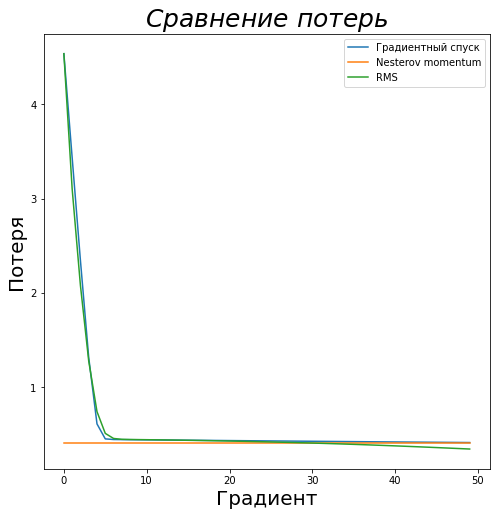

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(range(50),evaluation, label='Градиентный спуск')
plt.plot(range(50),evaluationNM,label = 'Nesterov momentum')
plt.plot(range(50),evaluation_rms, label='RMS')
plt.title('$Сравнение$ $потерь$', fontsize=25)
plt.xlabel('Градиент', fontsize=20)
plt.ylabel('Потеря', fontsize=20)
plt.legend()
plt.show()